<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/blob/main/Bank_Marketing_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Extension/main/'
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [4]:
# data_orig = pd.read_csv(path_to_data+"Bank_Imbalanced_Fine_Tuning_Updated.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data+"Bank_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data+"Bank_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data+"Bank_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sym = pd.read_csv(path_to_data+"Bank_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data+"Bank_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data+"Bank_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data2+"Bank_Imbalanced_Fine_Tuning_5_20.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+"Bank_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+"Bank_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+"Bank_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+"Bank_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+"Bank_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+"Bank_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)


# data_orig

Original (imbalanced) data performance:

In [5]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.000000,1.000000
1,1,0.000000,1.000000
2,2,0.000000,1.000000
3,3,0.000000,1.000000
4,4,0.000000,1.000000
...,...,...,...
95,95,0.005414,0.989619
96,96,0.000773,0.993080
97,97,0.006187,0.986159
98,98,0.005414,0.989619


Error type: FPR
Mean: 0.0028074245939674926
Variance: 8.261040393726939e-06
Variance of estimate: 8.261040393726938e-08
Standard error: 0.00028742025665785874
95% Confidence Interval:  [ 0.0022440808909180896 ,  0.0033707682970168956 ]
-----------------------------
Error type: FNR
Mean: 0.9908304498269895
Variance: 7.168704562174428e-05
Variance of estimate: 7.168704562174427e-07
Standard error: 0.0008466820278105841
95% Confidence Interval:  [ 0.9891709530524808 ,  0.9924899466014983 ]
-----------------------------


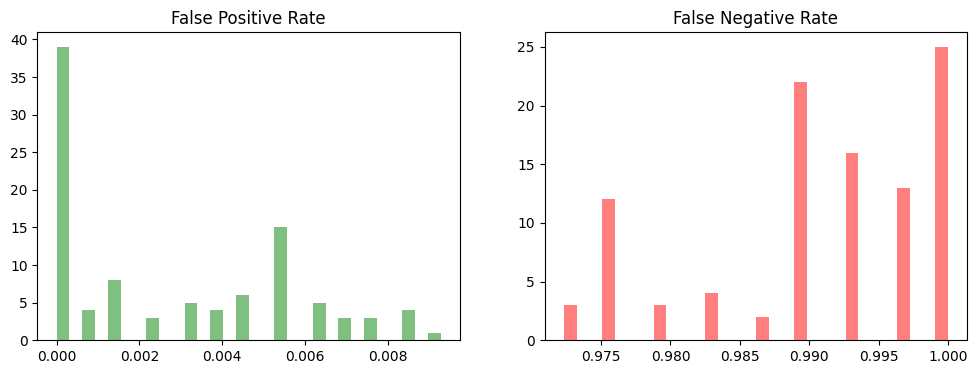

In [6]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

In [7]:
data_SRS

,Unnamed: 0,FPR,FNR
0,0,0.242846,0.352941
1,1,0.180974,0.439446
2,2,0.192575,0.432526
3,3,0.164733,0.491349
4,4,0.173241,0.446367
...,...,...,...
195,95,0.245166,0.397924
196,96,0.233565,0.418685
197,97,0.246713,0.401384
198,98,0.210363,0.456747


Error type: FPR
Mean: 0.2105065738581361
Variance: 0.000892016779949577
Variance of estimate: 4.460083899747885e-06
Standard error: 0.0021118910719418946
95% Confidence Interval:  [ 0.20636726735712999 ,  0.2146458803591422 ]
-----------------------------
Error type: FNR
Mean: 0.4372491349540138
Variance: 0.0031900234025352614
Variance of estimate: 1.5950117012676307e-05
Standard error: 0.003993759759008585
95% Confidence Interval:  [ 0.429421365826357 ,  0.4450769040816706 ]
-----------------------------


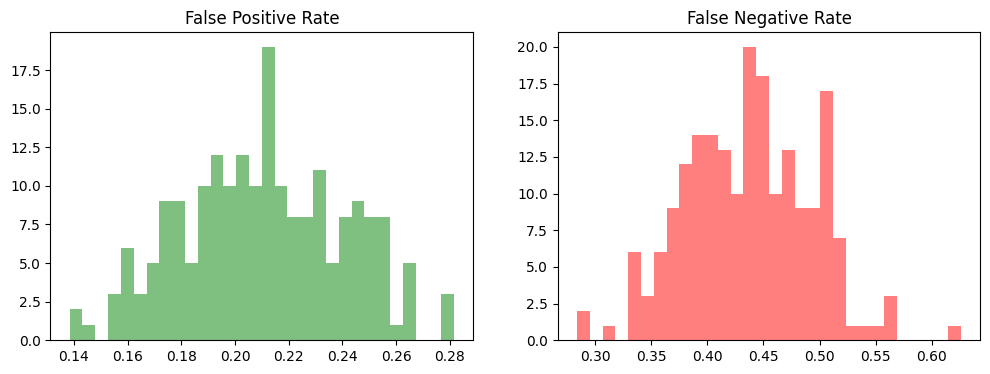

In [8]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

In [9]:
data_SRSwR

,Unnamed: 0,FPR,FNR
0,0,0.307038,0.359862
1,1,0.215004,0.487889
2,2,0.184841,0.529412
3,3,0.198763,0.498270
4,4,0.293890,0.370242
...,...,...,...
195,95,0.198763,0.532872
196,96,0.171694,0.577855
197,97,0.180974,0.557093
198,98,0.181748,0.560554


Error type: FPR
Mean: 0.21630703789582362
Variance: 0.0011361511365219552
Variance of estimate: 5.6807556826097755e-06
Standard error: 0.0023834335909795716
95% Confidence Interval:  [ 0.21163550805750367 ,  0.22097856773414357 ]
-----------------------------
Error type: FNR
Mean: 0.4534602076224567
Variance: 0.005063060297072481
Variance of estimate: 2.5315301485362402e-05
Standard error: 0.005031431355525225
95% Confidence Interval:  [ 0.44359860216562724 ,  0.46332181307928616 ]
-----------------------------


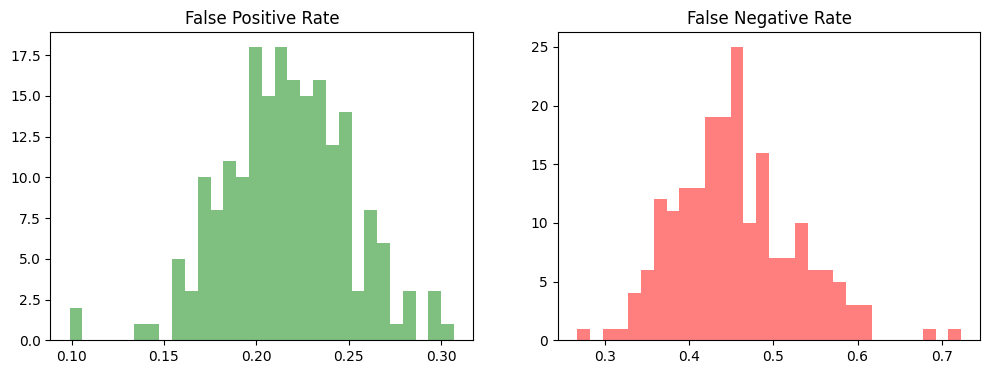

In [10]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

In [11]:
data_Sy

,Unnamed: 0,FPR,FNR
0,0,0.197216,0.498270
1,1,0.189482,0.512111
2,2,0.221191,0.439446
3,3,0.220418,0.435986
4,4,0.232019,0.415225
...,...,...,...
195,95,0.199536,0.453287
196,96,0.247486,0.349481
197,97,0.255220,0.328720
198,98,0.186388,0.491349


Error type: FPR
Mean: 0.205421500389184
Variance: 0.0009454629310143288
Variance of estimate: 4.727314655071644e-06
Standard error: 0.002174238867988438
95% Confidence Interval:  [ 0.20115999220792666 ,  0.20968300857044134 ]
-----------------------------
Error type: FNR
Mean: 0.4486332179999134
Variance: 0.004603012606893409
Variance of estimate: 2.3015063034467046e-05
Standard error: 0.004797401696175446
95% Confidence Interval:  [ 0.4392303106754095 ,  0.4580361253244173 ]
-----------------------------


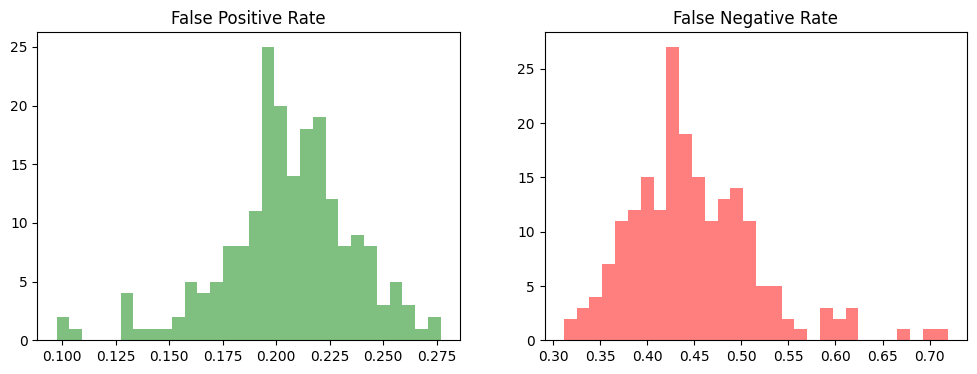

In [12]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.13159706110915312
Variance: 0.0028657952106411902
Variance of estimate: 1.4328976053205952e-05
Standard error: 0.0037853633977738455
95% Confidence Interval:  [ 0.12417774884951638 ,  0.13901637336878986 ]
-----------------------------
Error type: FNR
Mean: 0.693200692054879
Variance: 0.010268085619548667
Variance of estimate: 5.134042809774334e-05
Standard error: 0.0071652235204313994
95% Confidence Interval:  [ 0.6791568539548335 ,  0.7072445301549245 ]
-----------------------------


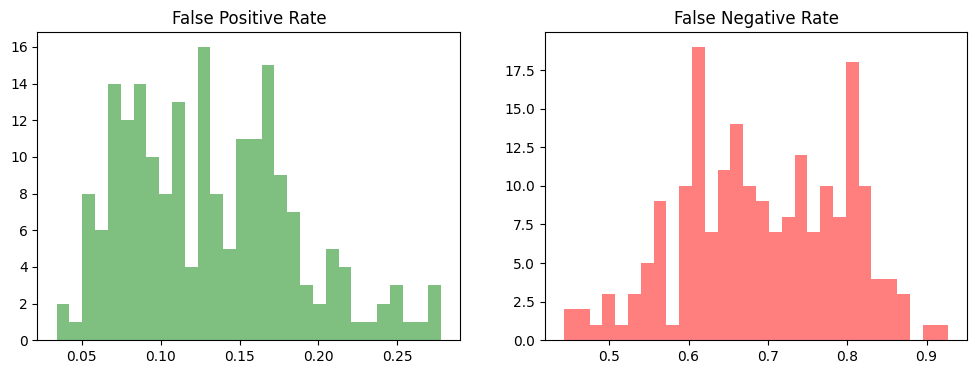

In [13]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.1643735498952629
Variance: 0.001414663821963662
Variance of estimate: 7.07331910981831e-06
Standard error: 0.0026595712266864204
95% Confidence Interval:  [ 0.1591607902909575 ,  0.1695863094995683 ]
-----------------------------
Error type: FNR
Mean: 0.5084083044973355
Variance: 0.009937080189145001
Variance of estimate: 4.9685400945725e-05
Standard error: 0.007048787196796694
95% Confidence Interval:  [ 0.494592681591614 ,  0.522223927403057 ]
-----------------------------


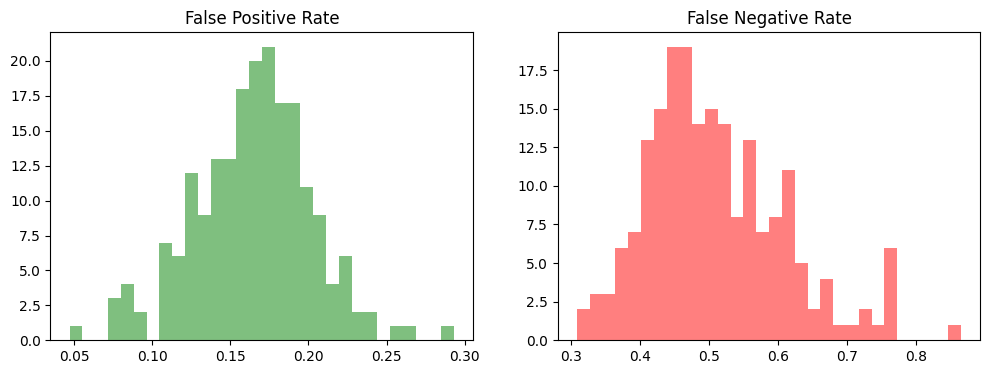

In [14]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.19519721577822113
Variance: 0.001092990139588154
Variance of estimate: 5.46495069794077e-06
Standard error: 0.002337723400648753
95% Confidence Interval:  [ 0.19061527791294958 ,  0.1997791536434927 ]
-----------------------------
Error type: FNR
Mean: 0.4267993079600692
Variance: 0.006364192160161239
Variance of estimate: 3.1820960800806195e-05
Standard error: 0.005641007073280993
95% Confidence Interval:  [ 0.4157429340964385 ,  0.43785568182369994 ]
-----------------------------


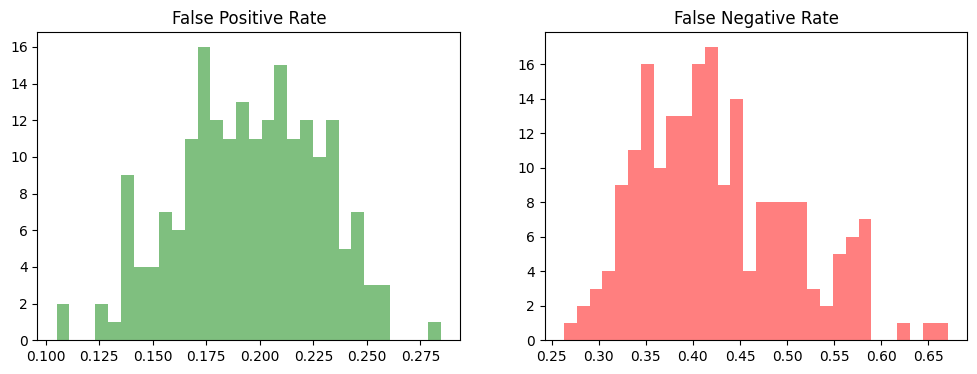

In [15]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [21]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.242846,0.307038,0.197216,0.057231,0.199536,0.174014,0.0
1,0.180974,0.215004,0.189482,0.064965,0.203403,0.162413,0.0
2,0.192575,0.184841,0.221191,0.085073,0.205723,0.160093,0.0
3,0.164733,0.198763,0.220418,0.081980,0.168600,0.185615,0.0
4,0.173241,0.293890,0.232019,0.093581,0.168600,0.156999,0.0
...,...,...,...,...,...,...,...
195,0.245166,0.198763,0.199536,0.214230,0.293117,0.197989,NaN
196,0.233565,0.171694,0.247486,0.109049,0.220418,0.159319,NaN
197,0.246713,0.180974,0.255220,0.180201,0.167053,0.139985,NaN
198,0.210363,0.181748,0.186388,0.169374,0.163960,0.197216,NaN


<Axes: title={'center': 'FPR'}>

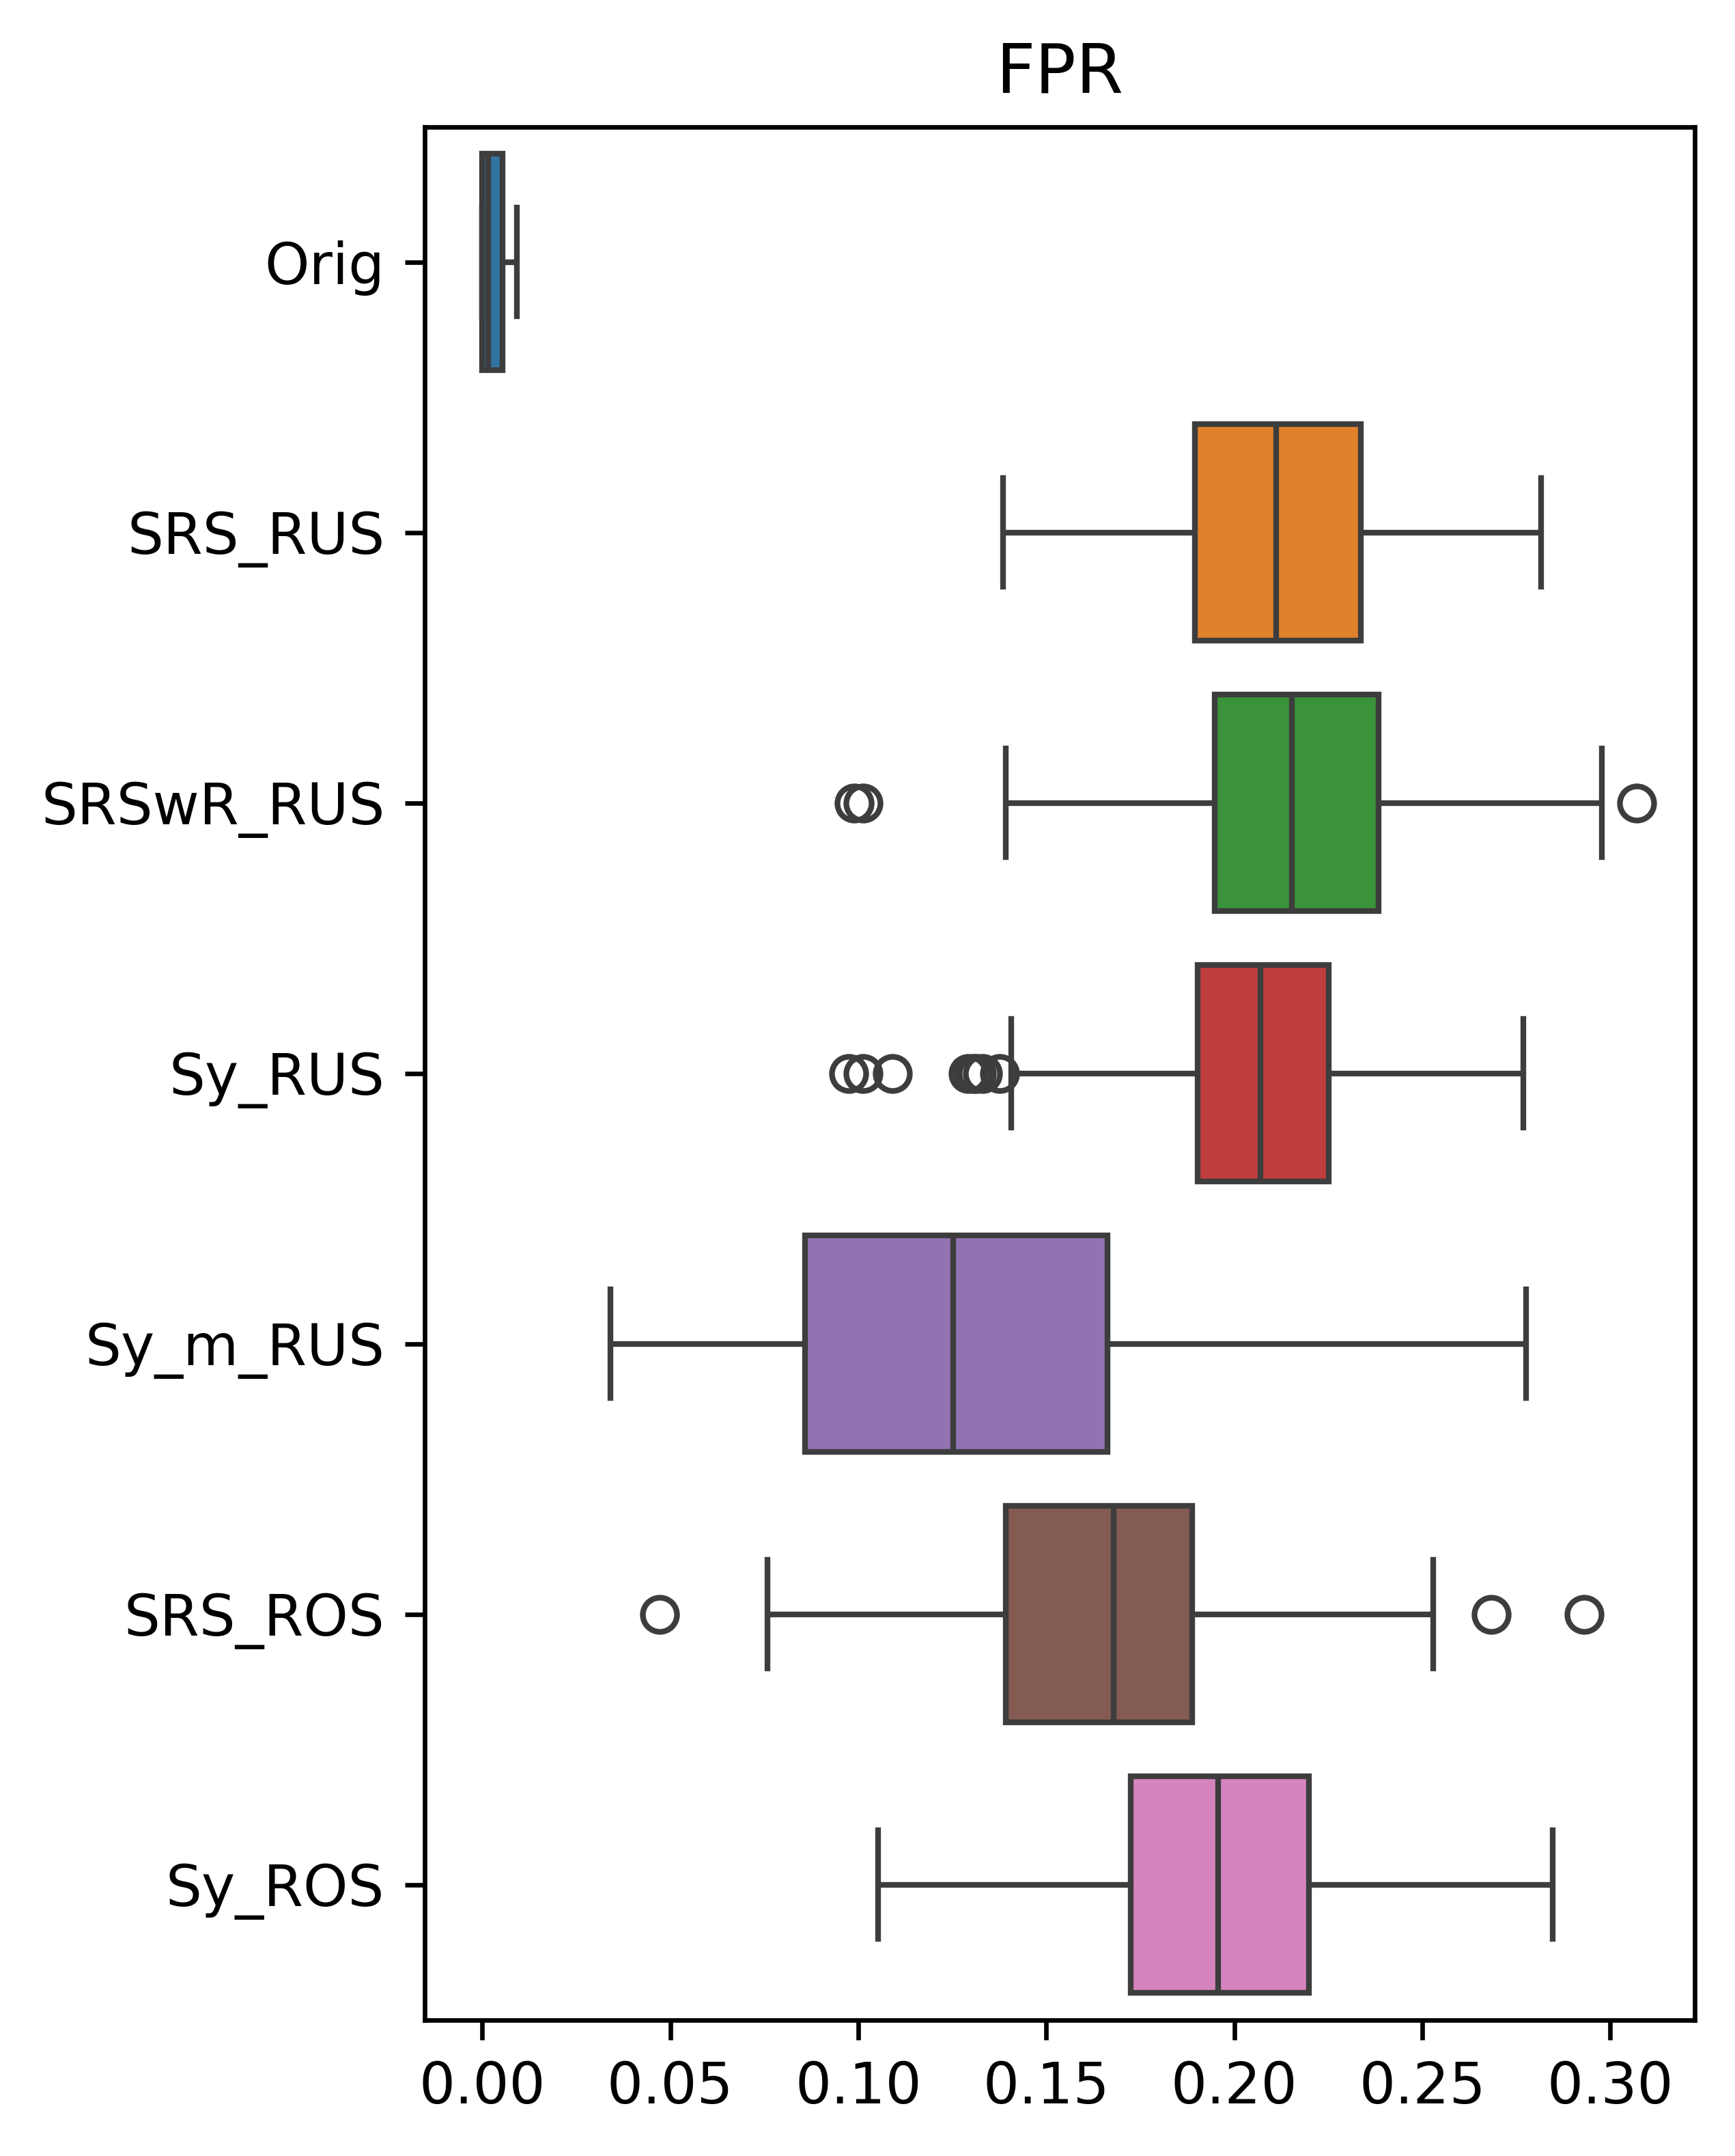

In [22]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [24]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.352941,0.359862,0.498270,0.851211,0.404844,0.415225,1.0
1,0.439446,0.487889,0.512111,0.844291,0.391003,0.446367,1.0
2,0.432526,0.529412,0.439446,0.813149,0.394464,0.460208,1.0
3,0.491349,0.498270,0.435986,0.813149,0.467128,0.384083,1.0
4,0.446367,0.370242,0.415225,0.785467,0.467128,0.453287,1.0
...,...,...,...,...,...,...,...
195,0.397924,0.532872,0.453287,0.546713,0.321799,0.418685,NaN
196,0.418685,0.577855,0.349481,0.698962,0.418685,0.529412,NaN
197,0.401384,0.557093,0.328720,0.598616,0.505190,0.550173,NaN
198,0.456747,0.560554,0.491349,0.605536,0.508651,0.442907,NaN


<Axes: title={'center': 'FNR'}>

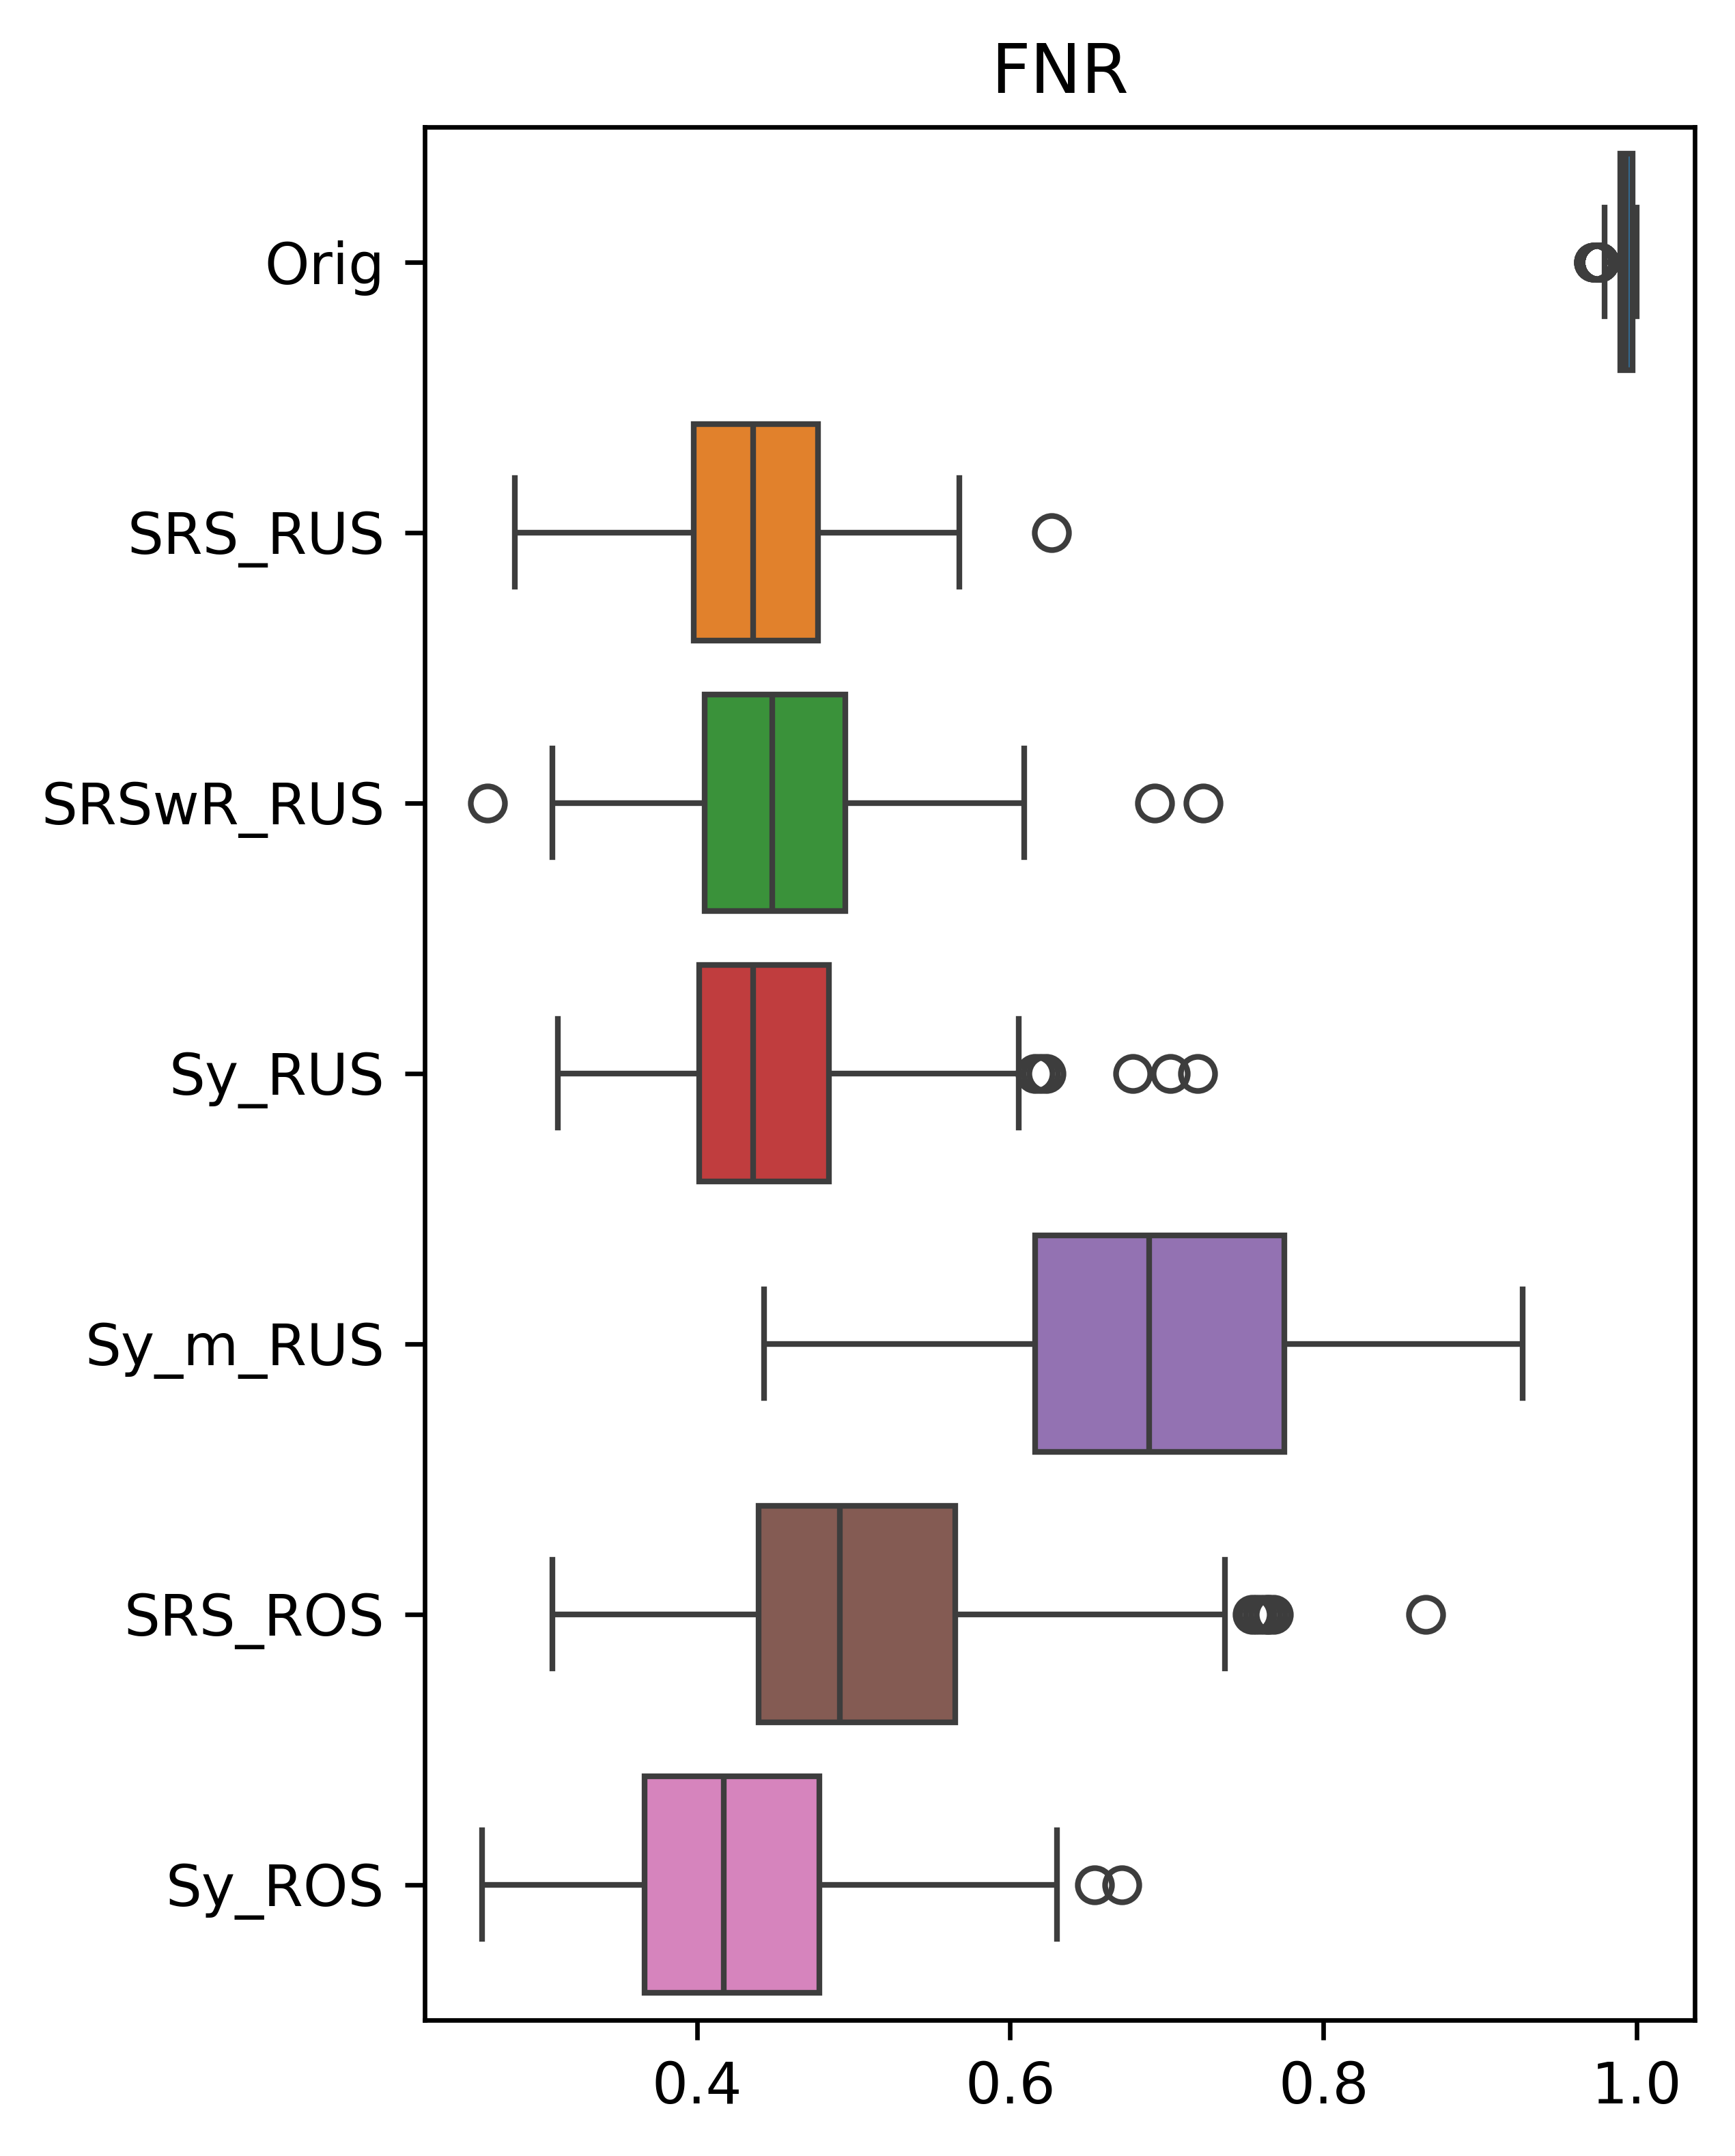

In [26]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [28]:
# data_orig = pd.read_csv(path_to_data+"Bank_Imbalanced.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data+"Bank_SRS_RUS.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data+"Bank_SRSwR_RUS.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data+"Bank_Sy_RUS.csv", sep=",", header=0)
# data_Sy2 = pd.read_csv(path_to_data+"Bank_Sy2_RUS.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data+"Bank_SRS_ROS.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data+"Bank_Sy_ROS.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data2+"Bank_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+"Bank_SRS_RUS_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+"Bank_SRSwR_RUS_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+"Bank_Sy_RUS_Extension.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data2+"Bank_Sy2_RUS_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+"Bank_SRS_ROS_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+"Bank_Sy_ROS_Extension.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,12.596636,0.098841,0.748299,0.251701,0.901159,0.764573
1,1,14.243331,0.104314,0.780612,0.219388,0.895686,0.984185
2,2,10.008150,0.131681,0.824830,0.175170,0.868319,0.772737
3,3,12.337391,0.174984,0.858844,0.141156,0.825016,0.789927
4,4,11.148867,0.120412,0.802721,0.197279,0.879588,0.767323
...,...,...,...,...,...,...,...
95,45,14.448388,0.139569,0.824830,0.175170,0.860431,1.072514
96,46,14.370264,0.164681,0.875850,0.124150,0.835319,1.093089
97,47,15.328663,0.148422,0.829932,0.170068,0.851578,1.060248
98,48,16.263812,0.099163,0.753401,0.246599,0.900837,1.296454


Original (imbalanced) dataset:

In [29]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 100
SRSwR RUS 100
Sy RUS 100
Sym RUS 100
SRS ROS 100
Sy ROS 100


In [30]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.02256922086284606
Variance: 4.0373200771533656e-05
Variance of estimate: 8.074640154306732e-07
Standard error: 0.0008985900152075323
95% Confidence Interval:  [ 0.020807984433039297 ,  0.024330457292652822 ]
-----------------------------
Error type: FNR
Mean: 0.6790476190476191
Variance: 0.005121170222913545
Variance of estimate: 0.00010242340445827089
Standard error: 0.010120444874523593
95% Confidence Interval:  [ 0.6592115470935529 ,  0.6988836910016853 ]
-----------------------------
Error type: Source time
Mean: 37.25087096371997
Variance: 46.34164482833837
Variance of estimate: 0.9268328965667674
Standard error: 0.9627216090681497
95% Confidence Interval:  [ 35.36393660994639 ,  39.137805317493545 ]
-----------------------------


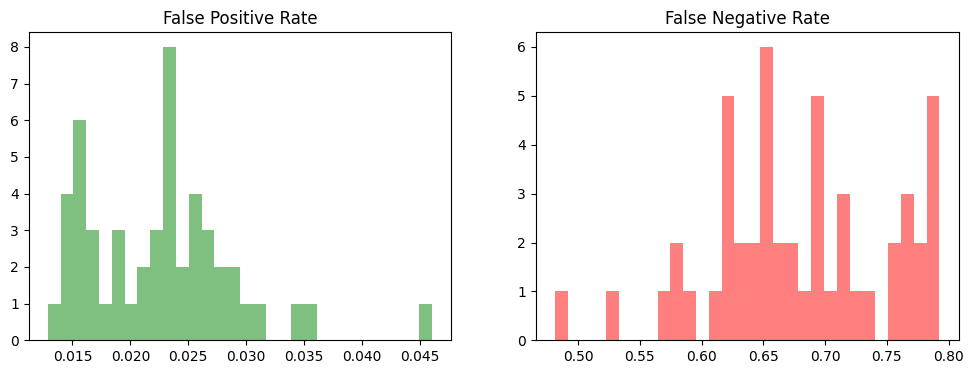

In [31]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.13337411460581453
Variance: 0.0008120222319853342
Variance of estimate: 8.120222319853342e-06
Standard error: 0.0028496003789748032
95% Confidence Interval:  [ 0.12778889786302391 ,  0.13895933134860514 ]
-----------------------------
Error type: FNR
Mean: 0.18520408163605445
Variance: 0.0020370358680315125
Variance of estimate: 2.0370358680315124e-05
Standard error: 0.004513353374190317
95% Confidence Interval:  [ 0.17635790902264142 ,  0.19405025424946748 ]
-----------------------------
Error type: Source time
Mean: 12.916390917519983
Variance: 3.629723335897527
Variance of estimate: 0.03629723335897527
Standard error: 0.1905183281444997
95% Confidence Interval:  [ 12.542974994356763 ,  13.289806840683204 ]
-----------------------------


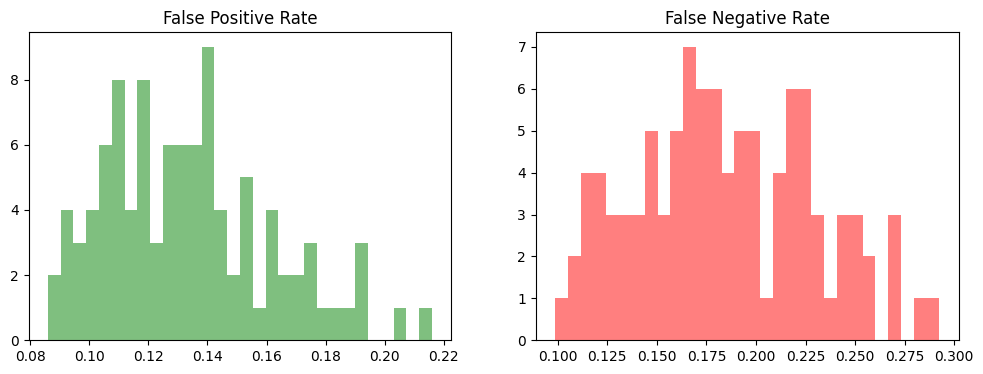

In [32]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.12861719251660653
Variance: 0.0008746282079910508
Variance of estimate: 8.746282079910508e-06
Standard error: 0.0029574113815819584
95% Confidence Interval:  [ 0.1228206662087059 ,  0.13441371882450717 ]
-----------------------------
Error type: FNR
Mean: 0.19712585034244895
Variance: 0.002826935125422877
Variance of estimate: 2.826935125422877e-05
Standard error: 0.00531689300759652
95% Confidence Interval:  [ 0.18670474004755977 ,  0.20754696063733813 ]
-----------------------------
Error type: Source time
Mean: 12.905712151449979
Variance: 2.9371961489977347
Variance of estimate: 0.02937196148997735
Standard error: 0.17138250053601548
95% Confidence Interval:  [ 12.569802450399388 ,  13.24162185250057 ]
-----------------------------


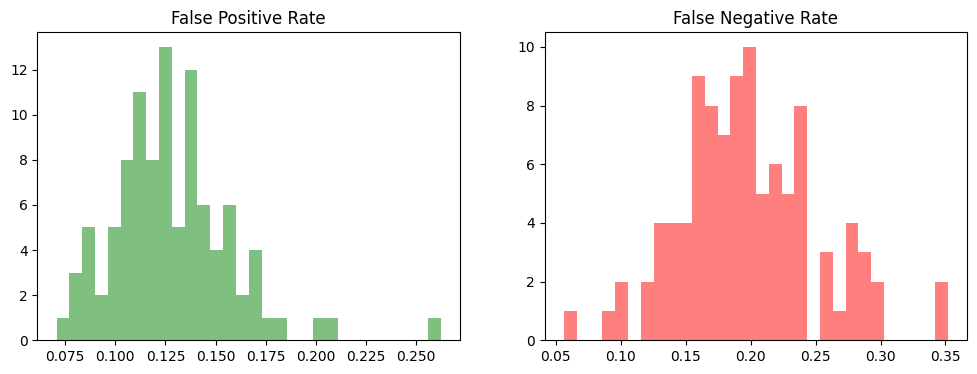

In [33]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.12755473278050863
Variance: 0.0007921705064528428
Variance of estimate: 7.921705064528428e-06
Standard error: 0.0028145523737405256
95% Confidence Interval:  [ 0.1220382101279772 ,  0.13307125543304008 ]
-----------------------------
Error type: FNR
Mean: 0.1976530612238775
Variance: 0.0026372393939426615
Variance of estimate: 2.6372393939426616e-05
Standard error: 0.005135405917688164
95% Confidence Interval:  [ 0.18758766562520868 ,  0.2077184568225463 ]
-----------------------------
Error type: Source time
Mean: 12.973305387870004
Variance: 3.818552182003918
Variance of estimate: 0.03818552182003918
Standard error: 0.19541116094030858
95% Confidence Interval:  [ 12.590299512427 ,  13.356311263313009 ]
-----------------------------


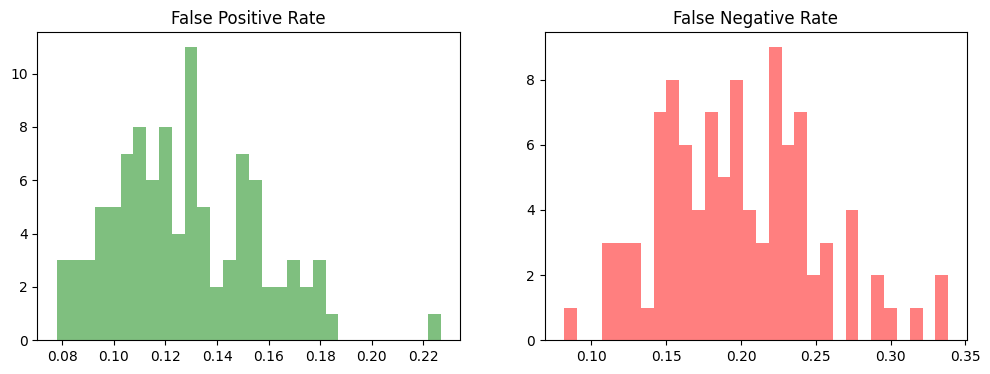

In [34]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [35]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,9.697337,0.132003,0.867997,0.212585,0.787415,0.764860
1,1,8.793765,0.126529,0.873471,0.195578,0.804422,1.023217
2,2,8.692254,0.106729,0.893271,0.250000,0.750000,1.070577
3,3,10.768860,0.113812,0.886188,0.207483,0.792517,0.761734
4,4,9.837659,0.133773,0.866227,0.171769,0.828231,0.775658
...,...,...,...,...,...,...,...
95,45,14.693536,0.102865,0.897135,0.268707,0.731293,0.958893
96,46,15.567728,0.105602,0.894398,0.261905,0.738095,1.340731
97,47,14.636901,0.120734,0.879266,0.193878,0.806122,1.159900
98,48,13.559861,0.137798,0.862202,0.173469,0.826531,0.991870


Error type: FPR
Mean: 0.1272343850576368
Variance: 0.000828073984560831
Variance of estimate: 8.28073984560831e-06
Standard error: 0.002877627468177267
95% Confidence Interval:  [ 0.12159423522000934 ,  0.13287453489526424 ]
-----------------------------
Error type: FNR
Mean: 0.20661564625734688
Variance: 0.002738319319396784
Variance of estimate: 2.738319319396784e-05
Standard error: 0.005232895297439826
95% Confidence Interval:  [ 0.19635917147436482 ,  0.21687212104032894 ]
-----------------------------
Error type: Source time
Mean: 12.764365366619954
Variance: 3.776460857974074
Variance of estimate: 0.03776460857974074
Standard error: 0.19433118272614083
95% Confidence Interval:  [ 12.383476248476718 ,  13.14525448476319 ]
-----------------------------


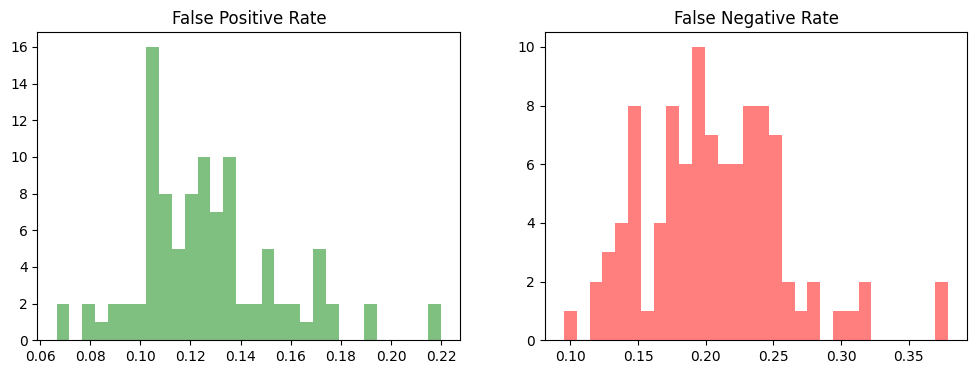

In [36]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.15288151963849964
Variance: 0.0006317701628282337
Variance of estimate: 6.3177016282823365e-06
Standard error: 0.0025135038548373735
95% Confidence Interval:  [ 0.14795505208301837 ,  0.1578079871939809 ]
-----------------------------
Error type: FNR
Mean: 0.12465986397312921
Variance: 0.0011377309093418095
Variance of estimate: 1.1377309093418095e-05
Standard error: 0.0033730266962207836
95% Confidence Interval:  [ 0.11804873164853648 ,  0.13127099629772196 ]
-----------------------------
Error type: Source time
Mean: 63.43668206939992
Variance: 156.7861641768707
Variance of estimate: 1.567861641768707
Standard error: 1.2521428200363995
95% Confidence Interval:  [ 60.98248214212858 ,  65.89088199667127 ]
-----------------------------


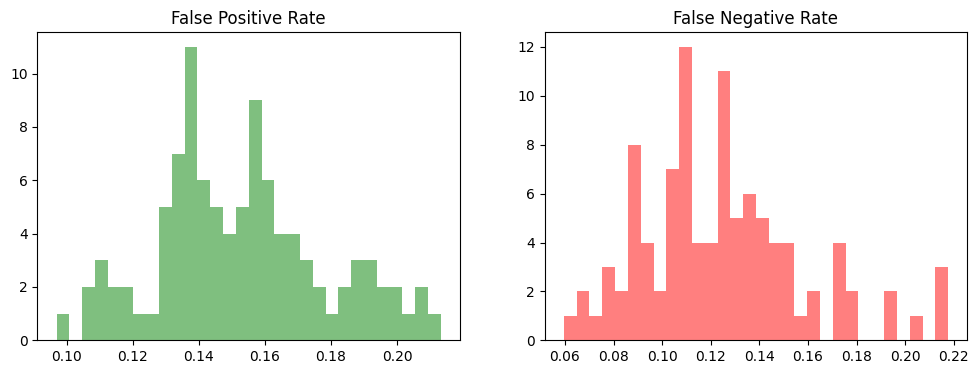

In [37]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [38]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,50.025062,0.192531,0.807469,0.091837,0.908163,0.784797
1,1,50.876569,0.169672,0.830328,0.095238,0.904762,2.514232
2,2,55.105255,0.124115,0.875885,0.164966,0.835034,0.802183
3,3,48.945116,0.159208,0.840792,0.122449,0.877551,0.802815
4,4,44.156225,0.154057,0.845943,0.132653,0.867347,1.077493
...,...,...,...,...,...,...,...
95,45,70.880282,0.148583,0.851417,0.110544,0.889456,1.084102
96,46,61.985778,0.108983,0.891017,0.210884,0.789116,1.301450
97,47,81.677482,0.176916,0.823084,0.091837,0.908163,1.075811
98,48,77.153137,0.162106,0.837894,0.124150,0.875850,1.311191


Error type: FPR
Mean: 0.15075820990667738
Variance: 0.0007273614682768141
Variance of estimate: 7.273614682768141e-06
Standard error: 0.0026969639750593893
95% Confidence Interval:  [ 0.14547216051556097 ,  0.15604425929779378 ]
-----------------------------
Error type: FNR
Mean: 0.1289965986478231
Variance: 0.0012493844339798675
Variance of estimate: 1.2493844339798676e-05
Standard error: 0.003534663256916941
95% Confidence Interval:  [ 0.12206865866426589 ,  0.1359245386313803 ]
-----------------------------
Error type: Source time
Mean: 63.973807815629925
Variance: 146.54735163735097
Variance of estimate: 1.4654735163735098
Standard error: 1.2105674356984455
95% Confidence Interval:  [ 61.601095641660976 ,  66.34651998959887 ]
-----------------------------


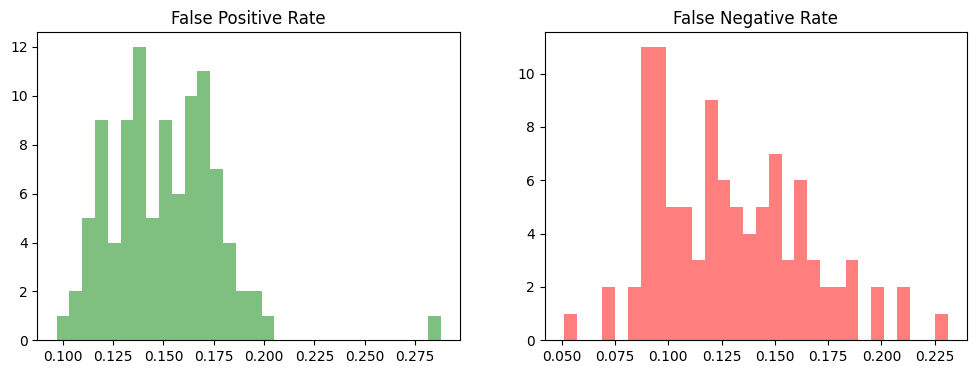

In [39]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [42]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.098841,0.110914,0.142144,0.132003,0.154540,0.192531,0.026722
1,0.104314,0.110592,0.130071,0.126529,0.168062,0.169672,0.015615
2,0.131681,0.155184,0.142949,0.106729,0.115744,0.124115,0.025435
3,0.174984,0.119929,0.109144,0.113812,0.144559,0.159208,0.022859
4,0.120412,0.201223,0.124276,0.133773,0.158403,0.154057,0.026722
...,...,...,...,...,...,...,...
95,0.139569,0.104636,0.151642,0.102865,0.140212,0.148583,NaN
96,0.164681,0.078558,0.109305,0.105602,0.157437,0.108983,NaN
97,0.148422,0.135222,0.148905,0.120734,0.154540,0.176916,NaN
98,0.099163,0.121700,0.179974,0.137798,0.125080,0.162106,NaN


<Axes: title={'center': 'FPR'}>

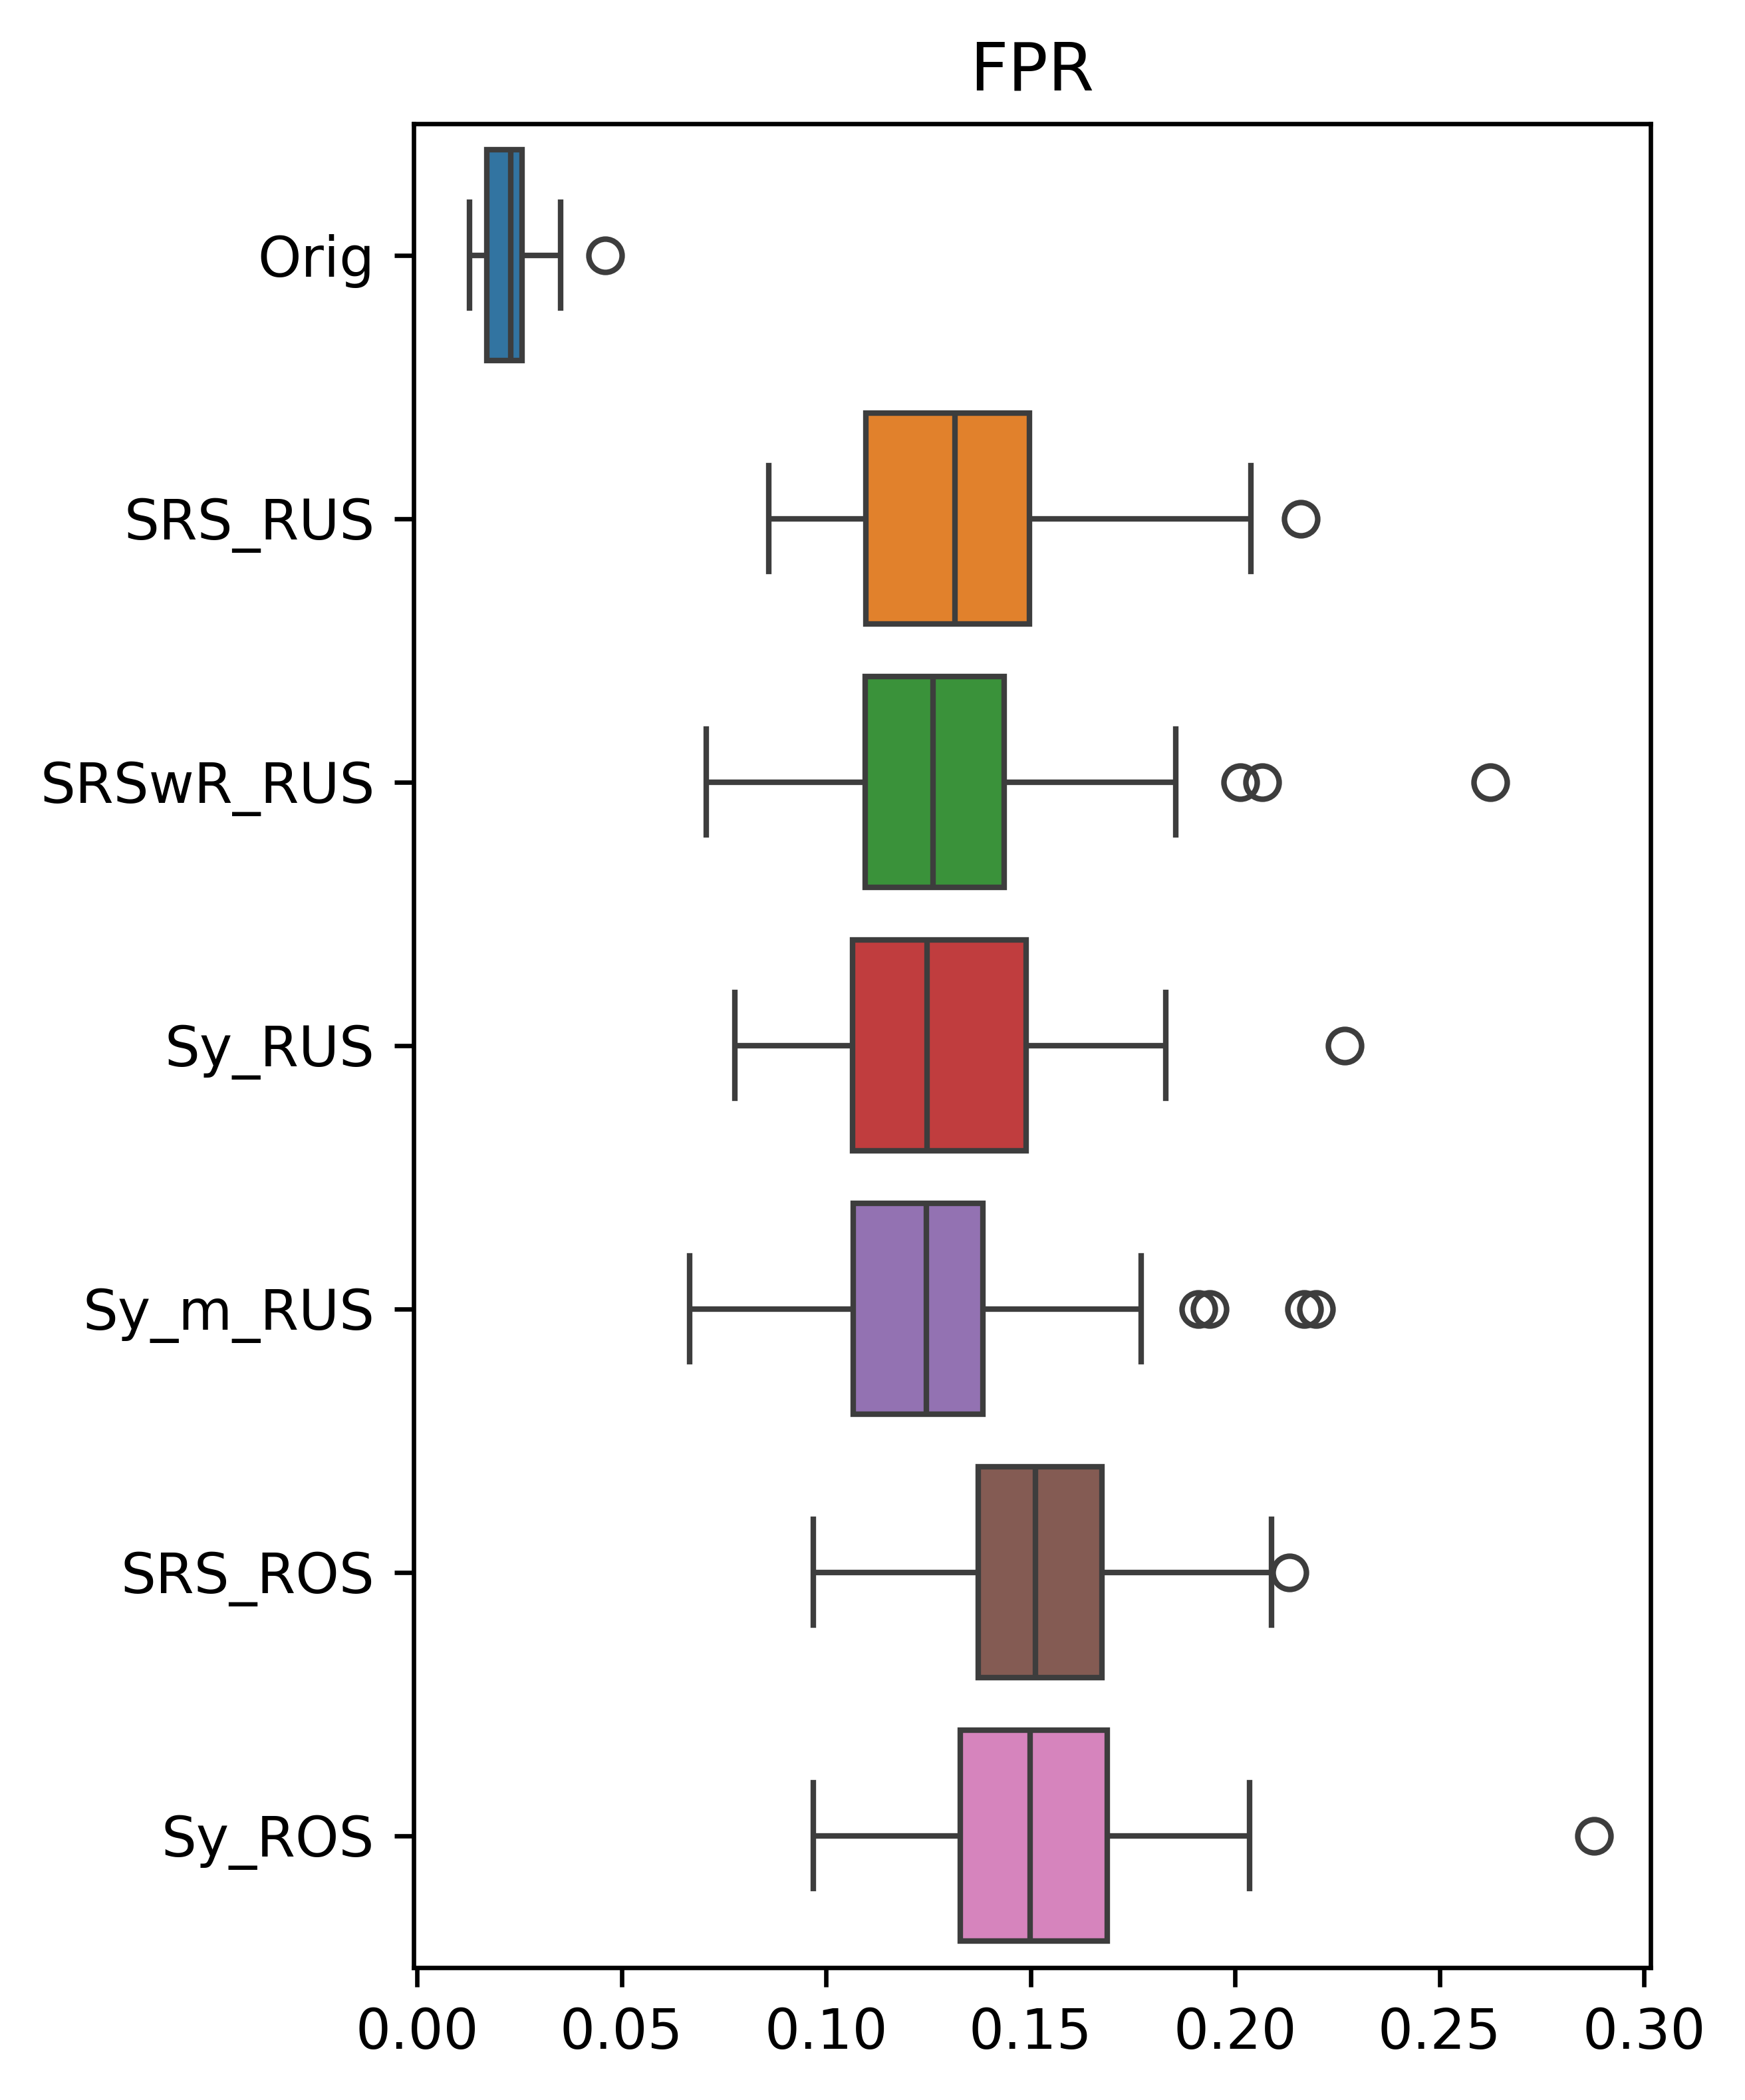

In [43]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [44]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.251701,0.236395,0.151361,0.212585,0.112245,0.091837,0.625850
1,0.219388,0.212585,0.171769,0.195578,0.086735,0.095238,0.784014
2,0.175170,0.130952,0.151361,0.250000,0.173469,0.164966,0.619048
3,0.141156,0.217687,0.219388,0.207483,0.134354,0.122449,0.678571
4,0.197279,0.096939,0.193878,0.171769,0.124150,0.132653,0.625850
...,...,...,...,...,...,...,...
95,0.175170,0.241497,0.146259,0.268707,0.125850,0.110544,NaN
96,0.124150,0.352041,0.224490,0.261905,0.112245,0.210884,NaN
97,0.170068,0.188776,0.149660,0.193878,0.113946,0.091837,NaN
98,0.246599,0.198980,0.115646,0.173469,0.173469,0.124150,NaN


<Axes: title={'center': 'FNR'}>

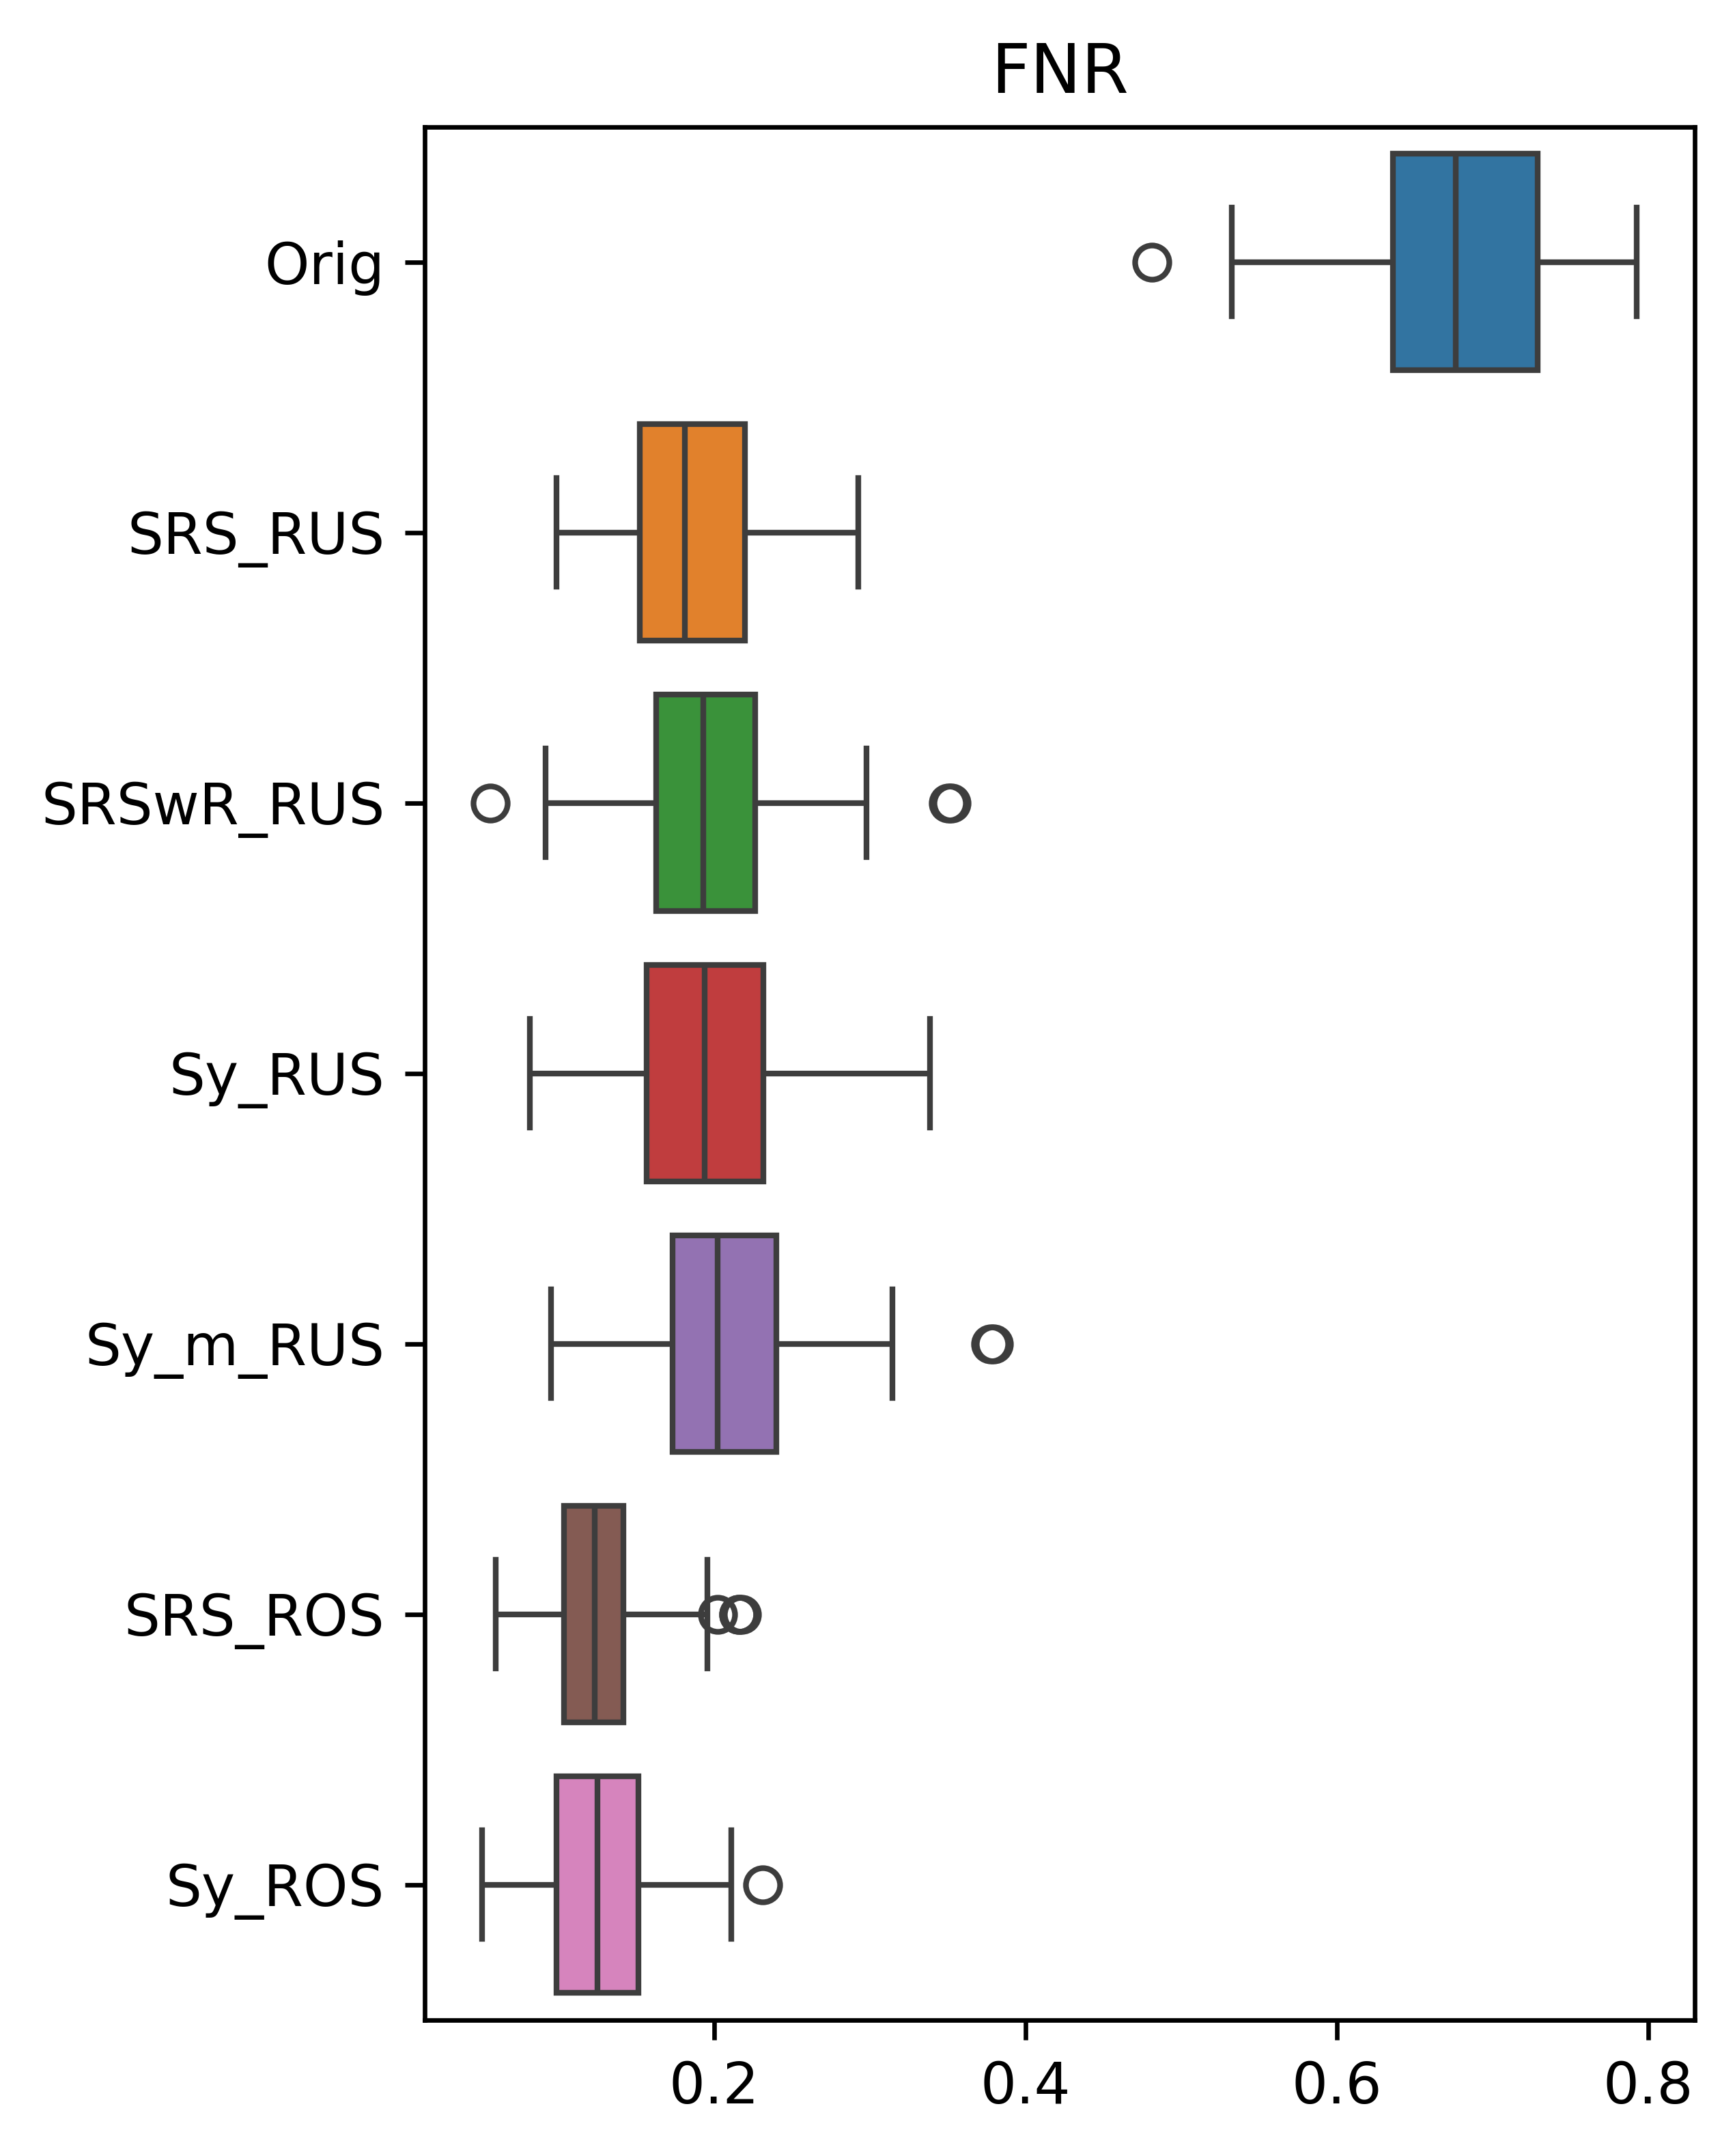

In [45]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [46]:
Time = pd.DataFrame()

DF = Time


DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time
DF['Orig'] = orig_time
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,12.596636,10.410867,10.037711,9.697337,48.135461,50.025062,26.506123
1,14.243331,9.822702,9.517267,8.793765,49.020401,50.876569,30.963898
2,10.008150,10.055883,9.689454,8.692254,48.054486,55.105255,28.215100
3,12.337391,8.093453,10.671759,10.768860,48.051297,48.945116,32.379692
4,11.148867,9.168984,9.555329,9.837659,47.424791,44.156225,30.922417
...,...,...,...,...,...,...,...
95,14.448388,14.202362,15.450980,14.693536,81.963008,70.880282,NaN
96,14.370264,14.385658,14.864571,15.567728,85.429199,61.985778,NaN
97,15.328663,13.548131,14.963551,14.636901,79.204188,81.677482,NaN
98,16.263812,13.683463,13.789295,13.559861,91.507263,77.153137,NaN


<Axes: title={'center': 'Training Time'}>

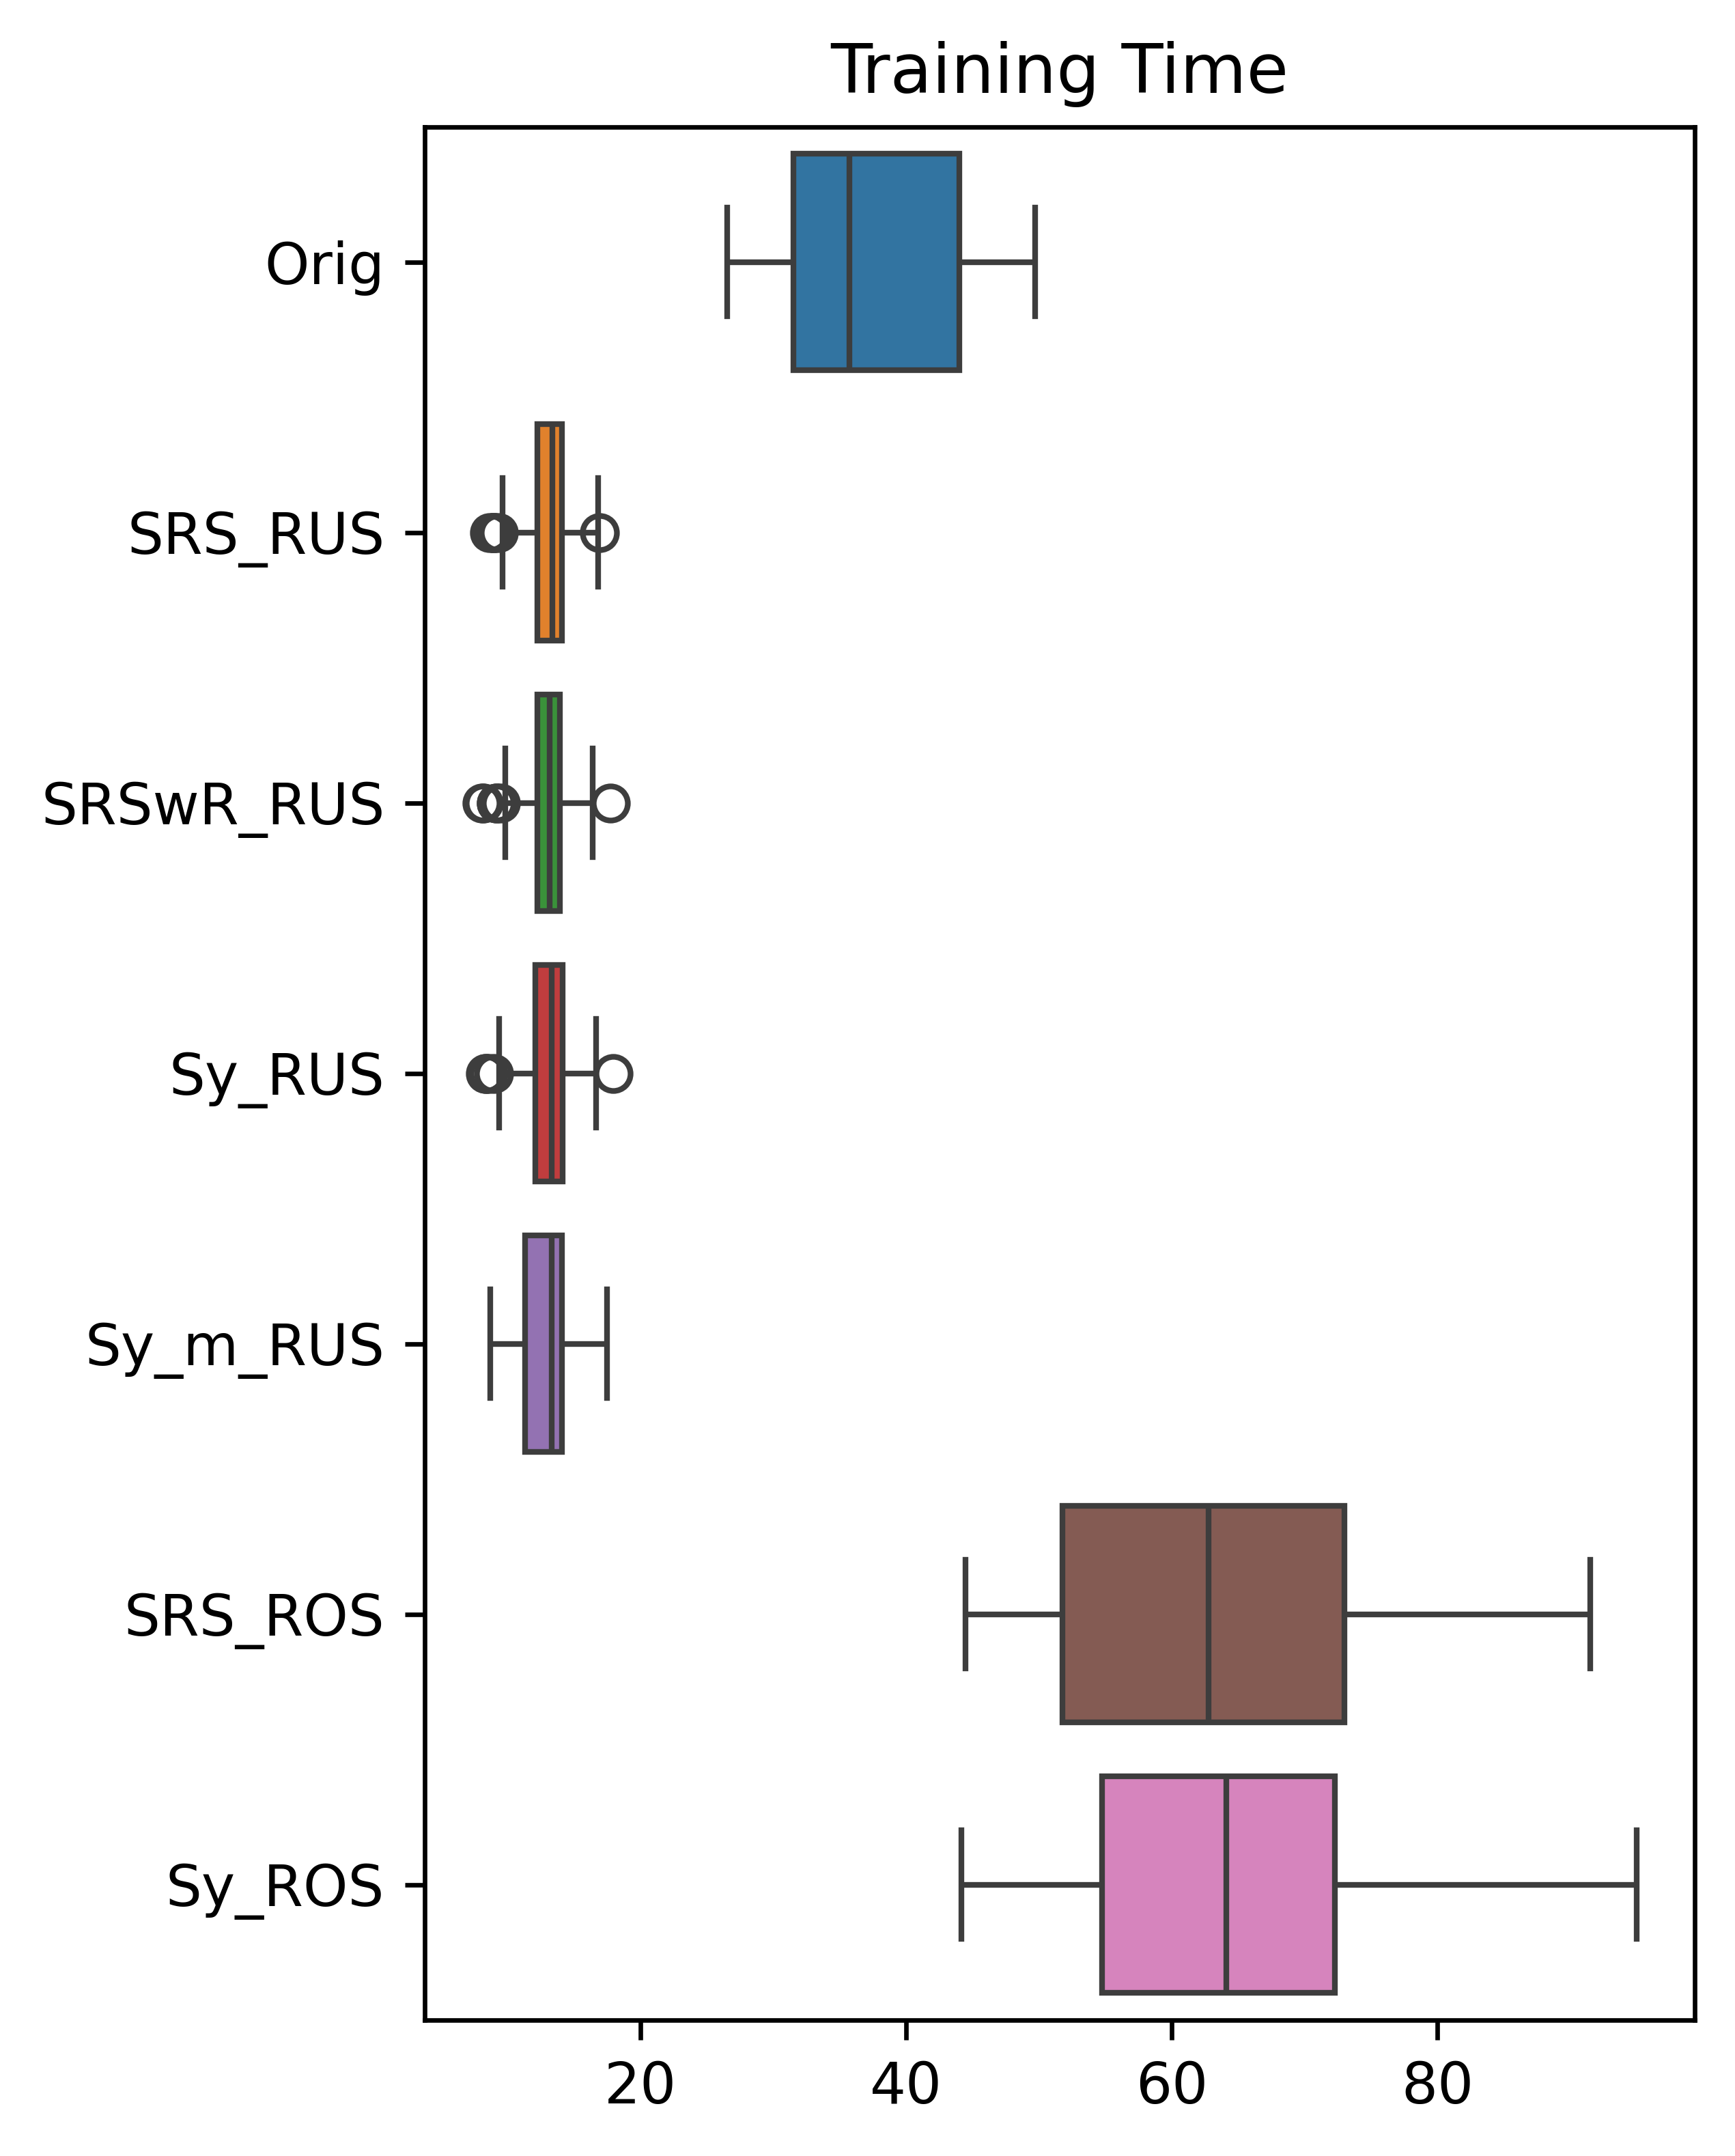

In [47]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')